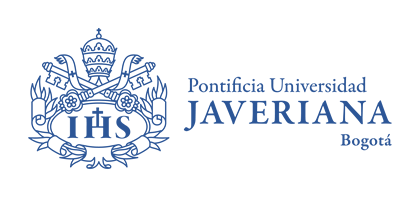

# Gestión de Datos - Parcial
- Juan Sebastián Vargas Torres

## Imports

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Lectura de datos

In [344]:
exams_df= pd.read_csv("https://github.com/datapreparation-javeriana/exam1/blob/master/data/StudentsPerformance_exam1.csv?raw=true")

## Funciones útiles

In [345]:
def  getLimitsAndMedian(attribute):

  # Cuartil 1
  q1 = attribute.quantile(0.25)
 
  # Cuartil 3
  q3 = attribute.quantile(0.75)

  med = attribute.median()
  
  # IQR
  iqr = q3-q1
  
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  print("Q1: ",q1," Q3: ", q3," Median: ", med," IQR: ", iqr)
  return upper_bound, lower_bound, med

## Exploración

In [346]:
exams_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [347]:
exams_df.shape

(1000, 8)

In [348]:
exams_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [349]:
exams_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [350]:
columns= exams_df.columns
for c in columns:
  print("--------------------------COLUMN: ",c,"----------------------------\n\n")
  print(exams_df[c].unique())
  print(exams_df[c].value_counts())
  print("---------------------------------------------------------\n\n\n")

--------------------------COLUMN:  gender ----------------------------


['non-binary' 'female' 'male' nan]
female        424
male          386
non-binary    143
Name: gender, dtype: int64
---------------------------------------------------------



--------------------------COLUMN:  race/ethnicity ----------------------------


['group B' 'group C' 'group A' 'group D' 'group E' nan]
group C    306
group D    246
group B    181
group E    133
group A     89
Name: race/ethnicity, dtype: int64
---------------------------------------------------------



--------------------------COLUMN:  parental level of education ----------------------------


["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
some college          213
associate's degree    209
high school           180
some high school      168
bachelor's degree     113
master's degree        57
Name: parental level of education, dtype: int64
------------------------------

## Preguntas

### Pregunta 1
¿Qué tipo de variables tiene el dataset? Detalle el tipo de variable de cada
columna.

In [351]:
exams_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

Las variables y sus  tipos del del dataframe se pueden observar a continuación:


Atributo  |Type
-------------------|-------------------
 Gender         | object (Categórico)
 Race         |  object (Categórico)
 parental level of education         |  object (Categórico-ordinal)
 lunch         |  object (Categórico)
 test preparation course          |  object (Categórico)
 math score     |  float 64 (Numérico)
 reading score   |  float 64 (Numérico)
 writing score   |  float 64 (Numérico)

### Pregunta 2
¿Qué tipo de problemas de calidad de datos logra identificar? Defina e
implemente las estrategias de limpieza de datos que correspondan.

In [352]:
exams_df.isna().sum()

gender                         47
race/ethnicity                 45
parental level of education    60
lunch                          54
test preparation course        41
math score                     51
reading score                  48
writing score                  49
dtype: int64

#### Gender

Gender presenta datos nulos 

In [353]:
exams_df["gender"].value_counts()

female        424
male          386
non-binary    143
Name: gender, dtype: int64

In [354]:
moda_gender=exams_df["gender"].mode()
moda_gender

0    female
dtype: object

In [355]:
exams_df["gender"].isna().sum()/exams_df.shape[0]

0.047

In [356]:
exams_df["gender"]=exams_df["gender"].fillna("female")

In [357]:
exams_df["gender"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~4%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 
No se encontraron valores inconsistentes.
Se asume que el valor "non-binary" es un dato válido.

#### Race

In [358]:
exams_df["race/ethnicity"].value_counts()

group C    306
group D    246
group B    181
group E    133
group A     89
Name: race/ethnicity, dtype: int64

In [359]:
exams_df["race/ethnicity"].isna().sum()/exams_df.shape[0]

0.045

In [360]:
moda_race=exams_df["race/ethnicity"].mode()
moda_race

0    group C
dtype: object

In [361]:
exams_df["race/ethnicity"].fillna("group C", inplace= True)

In [362]:
exams_df["race/ethnicity"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~4%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 
No se encontraron valores inconsistentes.




#### Parental level of education

In [363]:
exams_df["parental level of education"].value_counts()

some college          213
associate's degree    209
high school           180
some high school      168
bachelor's degree     113
master's degree        57
Name: parental level of education, dtype: int64

In [364]:
exams_df["parental level of education"].isna().sum()/exams_df.shape[0]

0.06

In [365]:
moda_parental_level=exams_df["parental level of education"].mode()
moda_parental_level

0    some college
dtype: object

In [366]:
exams_df["parental level of education"].fillna("some college", inplace= True)

In [367]:
exams_df["parental level of education"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~6%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 
No se encontraron valores inconsistentes.


#### Lunch

In [368]:
exams_df["lunch"].value_counts()

standard        614
free/reduced    332
Name: lunch, dtype: int64

In [369]:
exams_df["lunch"].isna().sum()/exams_df.shape[0]

0.054

In [370]:
moda_lunch=exams_df["lunch"].mode()
moda_lunch

0    standard
dtype: object

In [371]:
exams_df["lunch"].fillna("standard", inplace= True)

In [372]:
exams_df["lunch"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~5%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 
No se encontraron valores inconsistentes.

#### Test preparation course

In [373]:
exams_df["test preparation course"].value_counts()

none         607
completed    352
Name: test preparation course, dtype: int64

In [374]:
exams_df["test preparation course"].isna().sum()/exams_df.shape[0]

0.041

In [375]:
moda_test_course=exams_df["test preparation course"].mode()
moda_test_course

0    none
dtype: object

In [376]:
exams_df["test preparation course"].fillna("none", inplace= True)

In [377]:
exams_df["test preparation course"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~4%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 
No se encontraron valores inconsistentes.
Se toma el valor "none" como válido.

#### math score

In [378]:
exams_df["math score"].value_counts()

65.0    34
69.0    32
62.0    32
59.0    31
61.0    25
        ..
28.0     1
18.0     1
0.0      1
22.0     1
8.0      1
Name: math score, Length: 81, dtype: int64

In [379]:
exams_df["math score"].unique()

array([ 72.,  69.,  90.,  nan,  76.,  71.,  88.,  40.,  64.,  38.,  58.,
        65.,  78.,  50.,  18.,  46.,  54.,  66.,  44.,  74.,  73.,  67.,
        63.,  56.,  97.,  81.,  75.,  55.,  53.,  59.,  57.,  82.,  77.,
        33.,   0.,  79.,  39.,  62.,  45.,  60.,  41.,  61.,  49.,  30.,
        47.,  42.,  27.,  43.,  68.,  85.,  98.,  87.,  52.,  70.,  51.,
        99.,  84.,  91.,  83.,  89.,  22., 100.,  96.,  94.,  80.,  48.,
        35.,  34.,  86.,  92.,  37.,  28.,  24.,  26.,  95.,  36.,  29.,
        32.,  93.,  19.,  23.,   8.])

In [380]:
exams_df["math score"].isna().sum()/exams_df.shape[0]

0.051

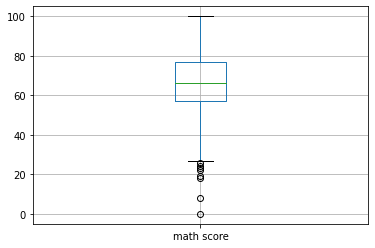

In [381]:
exams_df.boxplot(column=['math score'])

In [382]:
upper_bound, lower_bound,median = getLimitsAndMedian(exams_df['math score'])

Q1:  57.0  Q3:  77.0  Median:  66.0  IQR:  20.0


In [383]:
exams_df.loc[(exams_df["math score"] > upper_bound) | (exams_df["math score"] < lower_bound),"math score"]=66

In [384]:
moda_math_score=exams_df["math score"].mode()
moda_math_score

0    65.0
dtype: float64

In [385]:
exams_df["math score"].fillna(65, inplace= True)

In [386]:
exams_df["math score"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~5%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 

Se econtaron valores atípicos, por lo tanto se buscaron aquellos estuvieran 1.5IQR encima del Q3 o 1.5IQR por debajo del Q1 y luego estos se cambiaron por lo mediana.

#### Reading score

In [387]:
exams_df["reading score"].value_counts()

74.0    32
72.0    31
64.0    30
67.0    28
73.0    27
        ..
23.0     1
17.0     1
32.0     1
26.0     1
40.0     1
Name: reading score, Length: 72, dtype: int64

In [388]:
exams_df["reading score"].unique()

array([ 72.,  90.,  95.,  57.,  78.,  83.,  43.,  64.,  60.,  54.,  52.,
        81.,  53.,  75.,  89.,  32.,  42.,  58.,  69.,  73.,  71.,  74.,
        70.,  65.,  87.,  56.,  61.,  84.,  55.,  44.,  nan,  41.,  85.,
        59.,  17.,  80.,  37.,  51.,  49.,  26.,  68.,  45.,  39.,  86.,
        34.,  79.,  66.,  67.,  91., 100.,  63.,  76.,  77.,  82.,  92.,
        93.,  62.,  88.,  50.,  28.,  48.,  46.,  23.,  38.,  94.,  97.,
        99.,  31.,  47.,  96.,  24.,  29.,  40.])

In [389]:
exams_df["reading score"].isna().sum()/exams_df.shape[0]

0.048

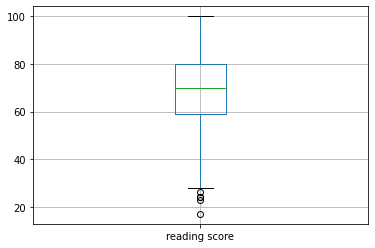

In [390]:
exams_df.boxplot(column=['reading score'])

In [391]:
upper_bound, lower_bound,median = getLimitsAndMedian(exams_df['reading score'])

Q1:  59.0  Q3:  80.0  Median:  70.0  IQR:  21.0


In [392]:
exams_df.loc[(exams_df["reading score"] > upper_bound) | (exams_df["reading score"] < lower_bound),"reading score"]=70

In [393]:
moda_reading_score=exams_df["reading score"].mode()
moda_reading_score

0    74.0
dtype: float64

In [394]:
exams_df["reading score"].fillna(74, inplace= True)

In [395]:
exams_df["reading score"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~5%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 

Se econtaron valores atípicos, por lo tanto se buscaron aquellos estuvieran 1.5IQR encima del Q3 o 1.5IQR por debajo del Q1 y luego estos se cambiaron por lo mediana.

#### Writing score

In [396]:
exams_df["writing score"].value_counts()

74.0    34
70.0    32
68.0    30
80.0    27
73.0    26
        ..
10.0     1
22.0     1
15.0     1
30.0     1
23.0     1
Name: writing score, Length: 77, dtype: int64

In [397]:
exams_df["writing score"].unique()

array([ nan,  88.,  93.,  44.,  75.,  78.,  92.,  39.,  67.,  50.,  52.,
        43.,  73.,  70.,  58.,  86.,  28.,  46.,  61.,  63.,  53.,  80.,
        72.,  55.,  65.,  74.,  38.,  82.,  79.,  83.,  59.,  57.,  54.,
        68.,  66.,  62.,  76.,  48.,  42.,  87.,  49.,  10.,  34.,  71.,
        37.,  56.,  41.,  22.,  81.,  45.,  36.,  89.,  47.,  90., 100.,
        64.,  98.,  51.,  40.,  84.,  69.,  33.,  60.,  85.,  91.,  77.,
        27.,  94.,  95.,  19.,  35.,  32.,  96.,  97.,  99.,  15.,  30.,
        23.])

In [398]:
exams_df["writing score"].isna().sum()/exams_df.shape[0]

0.049

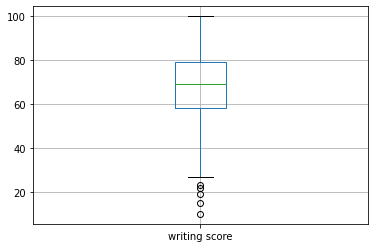

In [399]:
exams_df.boxplot(column=['writing score'])

In [400]:
upper_bound, lower_bound,median = getLimitsAndMedian(exams_df['writing score'])

Q1:  58.0  Q3:  79.0  Median:  69.0  IQR:  21.0


In [401]:
exams_df.loc[(exams_df["writing score"] > upper_bound) | (exams_df["writing score"] < lower_bound),"writing score"]=69

In [402]:
moda_writing_score=exams_df["writing score"].mode()
moda_writing_score

0    74.0
dtype: float64

In [403]:
exams_df["writing score"].fillna(74, inplace= True)

In [404]:
exams_df["writing score"].isna().sum()/exams_df.shape[0]

0.0

Se validó la cantidad de nulls que habían y se logró indentificar que el porcentaje era del ~5%, en este caso se pudo directamente eliminar dichos registros, sin embargo, lo que se hizo fue cambiarlos por la moda. 

Se econtaron valores atípicos, por lo tanto se buscaron aquellos estuvieran 1.5IQR encima del Q3 o 1.5IQR por debajo del Q1 y luego estos se cambiaron por lo mediana.

### Pregunta 3
¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?
¿Hay evidencia de algún sesgo en la distribución de dichos puntajes?

In [405]:
print("Math Average: ",exams_df["math score"].mean())
print("Reading Average: ",exams_df["reading score"].mean())
print("Writing Average: ",exams_df["writing score"].mean())

Math Average:  66.451
Reading Average:  69.721
Writing Average:  68.723


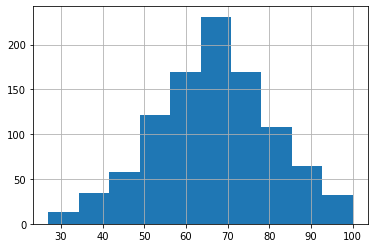

In [406]:
exams_df["math score"].hist()

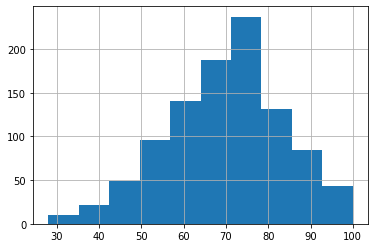

In [407]:
exams_df["reading score"].hist()

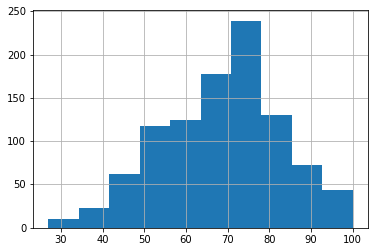

In [408]:
exams_df["writing score"].hist()

Se logra observar que la asignatura que en promedio tiene mayor puntaje es Reading.

Para el caso de Math: Se puede obsevar que no tiene ningún sesgo, es simétrica la distribución.

Para el caso de Reading: Se puede obsevar que tiene un ligero sesgo hacia la derecha.

Para el caso de Writing: Se puede obsevar que tiene un ligero sesgo hacia la derecha.

### Pregunta 4
¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?

In [409]:
corr = exams_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,math score,reading score,writing score
math score,1.000000,0.736316,0.711311
reading score,0.736316,1.000000,0.891852
writing score,0.711311,0.891852,1.000000


Se puede observar que existen una alta correlación positiva entre todos los features, resaltando una mayor correlación entre los features: "Reading Score" y "Writing Score".

### Pregunta 5
¿Hay alguna diferencia observable en los puntajes de la asignatura de matemáticas entre géneros? ¿Qué género obtuvo en promedio los mejores puntajes?

In [410]:
group_gender_math_score=  exams_df.copy()

In [411]:
group_gender_math_score=group_gender_math_score[["gender","math score"]]

In [412]:
group_gender_math_score=group_gender_math_score.groupby(by="gender").mean().reset_index()

In [413]:
group_gender_math_score

,gender,math score
0,female,64.267516
1,male,68.458549
2,non-binary,68.223776


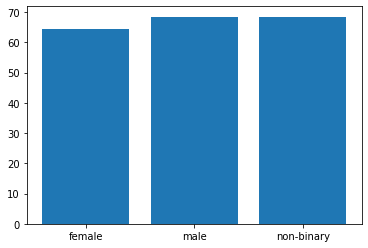

In [414]:
plt.bar(group_gender_math_score["gender"],group_gender_math_score["math score"])
plt.show()

Se puede observar que de media, los hombres tienden a tener un puntaje ligeramente mayor a de las mujeres y las personas consideradas como "non-binary"

En base a lo anterior, se logra obsevar una ligera diferencia en los puntajes obtenidos en matemáticas según el género.

### Pregunta 6
¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron un puntaje por encima del percentil 85 en la asignatura de escritura? ¿Cómo se distribuye la escolaridad entre esta población?.

In [415]:
percentil_85 = exams_df["writing score"].quantile(0.85)
percentil_85

83.0

In [416]:
parental_level_df=exams_df.copy()

In [417]:
parental_level_df=parental_level_df.loc[(parental_level_df["writing score"]>percentil_85)]

In [418]:
parental_level_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
16,male,group C,high school,standard,none,88.0,89.0,86.0
54,female,group C,some high school,free/reduced,completed,71.0,84.0,87.0


In [419]:
parental_level_df=parental_level_df[["parental level of education"]]

In [420]:
parental_level_df=parental_level_df.groupby(by="parental level of education").size().reset_index()

In [421]:
parental_level_df

,parental level of education,0
0,associate's degree,36
1,bachelor's degree,25
2,high school,9
3,master's degree,19
4,some college,41
5,some high school,16


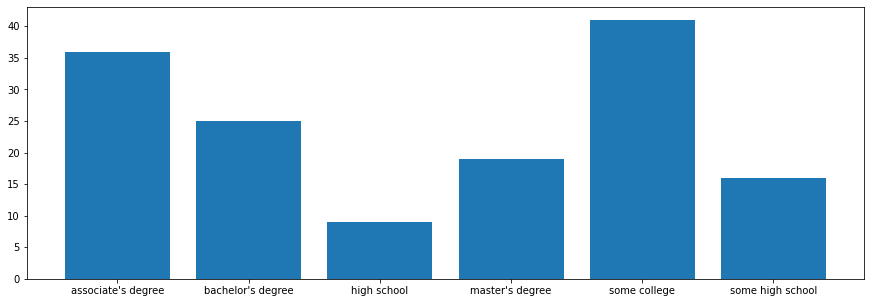

In [422]:
plt.figure(figsize=(15,5))
plt.bar(parental_level_df["parental level of education"],parental_level_df[0])
plt.show()

Se puede obsevar que los padres de los hijos que obtuvieron un writing score superior al percentil 85, tienen todos los distintos tipos de escolaridad, aunque los más representativos son "associate's degree" y "some college"

### Pregunta 7

¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a 90 en las tres asignaturas? De estos estudiantes¿que porcentaje estudió para los exámenes?

In [423]:
best_students_df=exams_df.copy()

In [424]:
best_students_df=best_students_df.loc[( (best_students_df["math score"]>=90) & (best_students_df["reading score"]>=90) & (best_students_df["writing score"]>=90))]

In [425]:
best_students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0
263,female,group E,high school,standard,none,99.0,93.0,90.0
451,female,group E,some college,standard,none,100.0,92.0,97.0
458,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0
474,female,group B,associate's degree,standard,completed,90.0,90.0,91.0
546,female,group A,some high school,standard,completed,92.0,100.0,97.0
562,male,group C,bachelor's degree,standard,completed,96.0,90.0,92.0
566,female,group E,bachelor's degree,free/reduced,completed,92.0,100.0,100.0


In [426]:
best_students_df.shape

(24, 8)

In [427]:
best_students_df.shape[0]/exams_df.shape[0]

0.024

In [428]:
completed_test=best_students_df.loc[ (best_students_df["test preparation course"]=="completed")]

In [429]:
completed_test.shape

(13, 8)

In [430]:
completed_test.shape[0]/best_students_df.shape[0]

0.5416666666666666

Se puede obsevar que solo el 2,4% de los estudiantes obtuvieron un puntaje igual o superior a 90 en las tres asignaturas.

Se puede observar que de ese 2,4% de los estudiantes, el ~54% de ellos se preparó para los exámenes.